# **Summary**
* **Built an end-to-end ML project on AI impact on jobs (2030).**
* **Cleaned and prepared raw data using pandas and NumPy.**
* **Performed EDA with charts and correlation analysis.**
* **Trained 5 supervised ML models for job-risk prediction.**
* **Compared models using accuracy and confusion matrices.**
* **Applied K-Means clustering for unsupervised job grouping.**
* **Used PCA for 3D cluster visualization.**
* **Analyzed feature importance with Random Forest.**

* ## Import all necessary libraries for data analysis and modeling......

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
plt.style.use("seaborn-v0_8")
K_VAL = 3

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

* ## Did Some Exploratory Data Analysis(EDA)....

In [3]:
#df.columns = [c.replace(" ", "_") for c in df.columns]

* ## Reading dataset using pandas......

In [4]:
df = pd.read_csv("D:\Download\AI_Impact_on_Jobs_2030.csv")

* ## Did Some Exploratory Data Analysis....

* ## Dataset Shape....

In [3]:
print('Shape:', df.shape)

* ## Dataset Preview ....

In [44]:
print(df.head())

             Job_Title  Average_Salary  Years_Experience Education_Level  \
0       Security Guard           45795                28        Master's   
1   Research Scientist          133355                20             PhD   
2  Construction Worker          146216                 2     High School   
3    Software Engineer          136530                13             PhD   
4    Financial Analyst           70397                22     High School   

   AI_Exposure_Index  Tech_Growth_Factor  Automation_Probability_2030  \
0               0.18                1.28                         0.85   
1               0.62                1.11                         0.05   
2               0.86                1.18                         0.81   
3               0.39                0.68                         0.60   
4               0.52                1.46                         0.64   

  Risk_Category  Skill_1  Skill_2  Skill_3  Skill_4  Skill_5  Skill_6  \
0          High     0.45     0.

* ## Dataset Information .....

In [45]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Ski

* ## Check Missing Values....

In [46]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Job_Title                      0
Average_Salary                 0
Years_Experience               0
Education_Level                0
AI_Exposure_Index              0
Tech_Growth_Factor             0
Automation_Probability_2030    0
Risk_Category                  0
Skill_1                        0
Skill_2                        0
Skill_3                        0
Skill_4                        0
Skill_5                        0
Skill_6                        0
Skill_7                        0
Skill_8                        0
Skill_9                        0
Skill_10                       0
dtype: int64


* ## Statistical Summary mean, min, max, and standard deviation......

In [47]:
print(df.describe(include="all"))

                Job_Title  Average_Salary  Years_Experience Education_Level  \
count                3000     3000.000000       3000.000000            3000   
unique                 20             NaN               NaN               4   
top     Software Engineer             NaN               NaN     High School   
freq                  175             NaN               NaN             784   
mean                  NaN    89372.279000         14.677667             NaN   
std                   NaN    34608.088767          8.739788             NaN   
min                   NaN    30030.000000          0.000000             NaN   
25%                   NaN    58640.000000          7.000000             NaN   
50%                   NaN    89318.000000         15.000000             NaN   
75%                   NaN   119086.500000         22.000000             NaN   
max                   NaN   149798.000000         29.000000             NaN   

        AI_Exposure_Index  Tech_Growth_Factor  Auto

* ## Summary(Risk Category) ....

In [5]:
print("\nSummary(Risk Category)")
print(df['Risk_Category'].value_counts())


Summary(Risk Category)
Risk_Category
Medium    1521
High       740
Low        739
Name: count, dtype: int64


* ## Histogram of Automation_Probability_2030.....

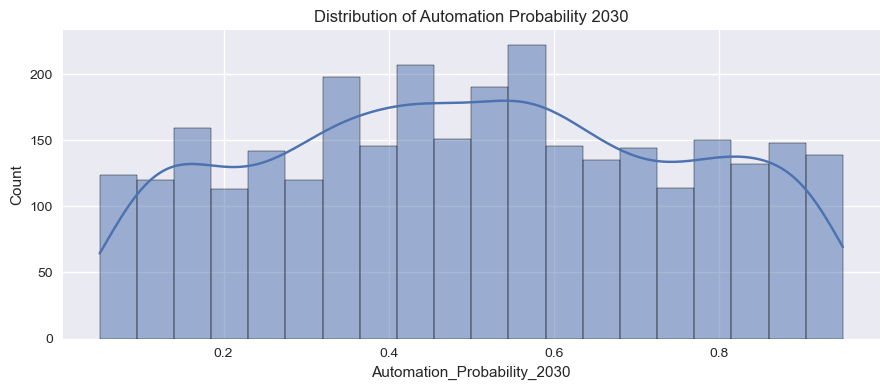

In [124]:
plt.figure(figsize=(9, 4))
sns.histplot(df["Automation_Probability_2030"], kde=True, bins=20)
plt.title("Distribution of Automation Probability 2030")
plt.xlabel("Automation_Probability_2030")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

* ## Risk category counts visualization .....


Risk category counts:
Risk_Category
Medium    1521
High       740
Low        739
Name: count, dtype: int64


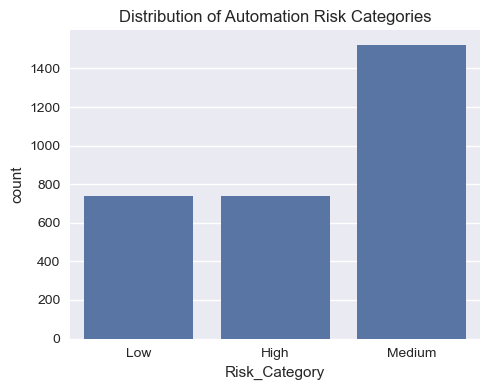

In [125]:
print("\nRisk category counts:")
print(df["Risk_Category"].value_counts())

plt.figure(figsize=(5,4))
sns.countplot(x="Risk_Category", data=df, order=["Low","High", "Medium"])
plt.title("Distribution of Automation Risk Categories")
plt.tight_layout()
plt.show()

* ## Correlation heatmap for numeric features........

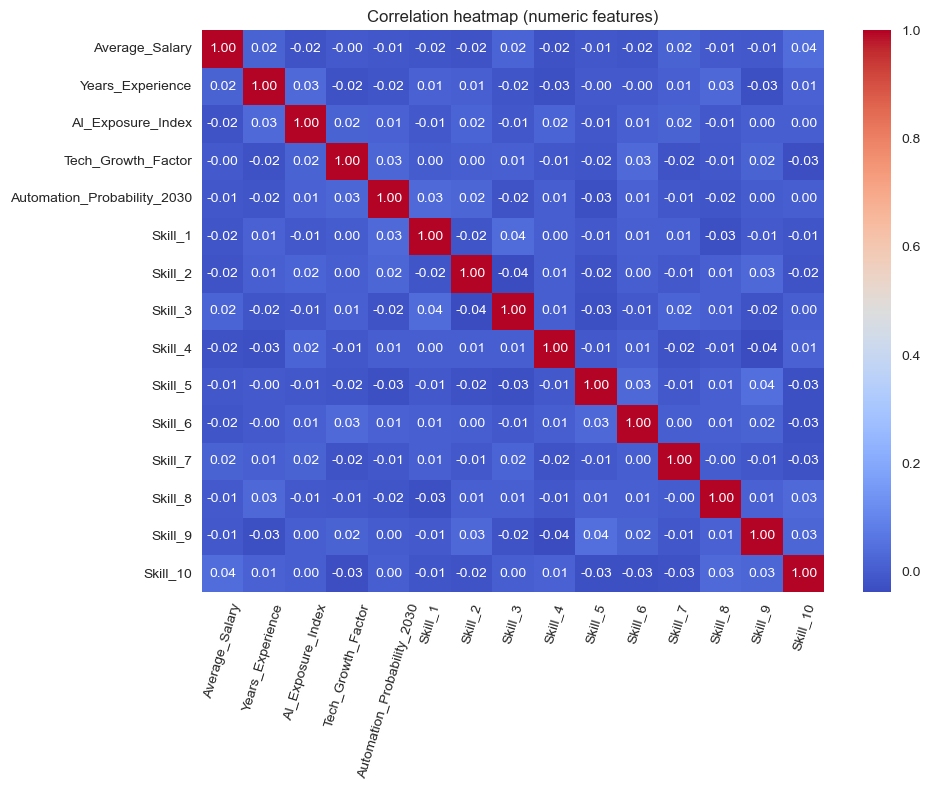

In [57]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True,fmt='.2f', cmap="coolwarm")
plt.title("Correlation heatmap (numeric features)")
plt.xticks(rotation=73)
plt.tight_layout()
plt.show()

* ## Encode the target variable (Risk_Category) into numerical labels......

In [8]:
label_encoder = LabelEncoder()
df["Risk_Category_Encoded"] = label_encoder.fit_transform(df["Risk_Category"])

* ## Separates input features (X) and the target variable (y).......

In [9]:
feature_cols = [c for c in df.select_dtypes(include=[np.number]).columns
                if c != "Risk_Category_Encoded"]

X = df[feature_cols]
y = df["Risk_Category_Encoded"]

* ## Split data into training 80% and testing 20% sets.......

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

* ## Training testing Shape.....

In [17]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y value counts:\n", y.value_counts())

X_train shape: (2400, 15)
X_test shape: (600, 15)
y value counts:
 Risk_Category_Encoded
2    1521
0     740
1     739
Name: count, dtype: int64


* ## Standardize all numerical features using StandardScaler......

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_results = {}
trained_models = {}

* ## Starting Unsupervised Analysis: K-Means & PCA....

* ## Elbow Method for Optimal Clusters....

In [68]:
print("--- Starting Unsupervised Analysis: K-Means & PCA ---")
inertia_values = []
max_k = 10 
# Test K from 1 to max_k
for k in range(1, max_k + 1):
    # Use X_train_scaled as K-Means is distance-based
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) 
    kmeans.fit(X_train_scaled)
    inertia_values.append(kmeans.inertia_)

--- Starting Unsupervised Analysis: K-Means & PCA ---

1. Running Elbow Method to find optimal K...


# Visualize the Elbow...

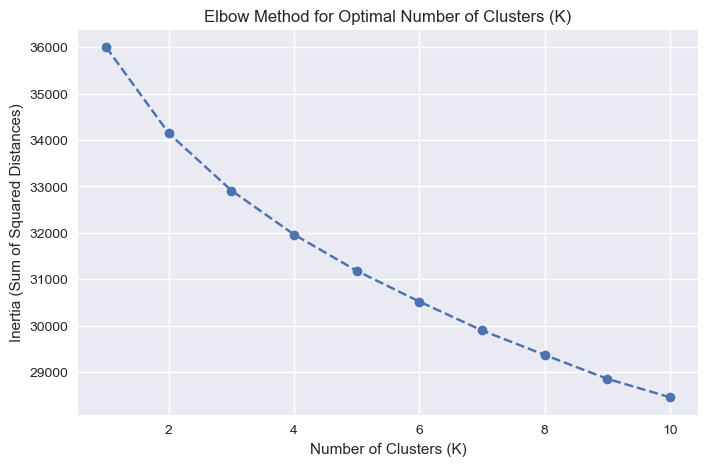

In [69]:
# Visualize the Elbow Method 
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_k + 1), inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()
print("")

* ## Clustering,PCA & Validation...

In [88]:
K_VAL = 3 
kmeans_val = KMeans(n_clusters=K_VAL, random_state=42, n_init='auto')
cluster_labels = kmeans_val.fit_predict(X_train_scaled)

# Validation: Compare Clusters to True Risk Categories
comparison_df = pd.DataFrame({
    'True_Risk_Category_Encoded': y_train,  
    'KMeans_Cluster': cluster_labels
})
cross_tab = pd.crosstab(comparison_df['True_Risk_Category_Encoded'], comparison_df['KMeans_Cluster'])

print(f"Cluster Alignment (K={K_VAL}):")
print(cross_tab)
print("\n")

--- Unsupervised Analysis: Step 2 (Clustering, 2D PCA & Validation) ---
Cluster Alignment (K=3):
KMeans_Cluster                0    1    2
True_Risk_Category_Encoded               
0                           104  260  228
1                           323  113  155
2                           412  380  425




* ## Perform Principal Component Analysis (PCA) to reduce dimensions...

In [91]:
# 2. Dimensionality Reduction with PCA
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_train_scaled)

explained_variance = pca.explained_variance_ratio_.sum()
print(f"Variance Explained by 3 PCs: {explained_variance:.2%}")

Variance Explained by 3 PCs: 22.32%


* ## Visualization for K-Means clusters in a 3D scatter plot...

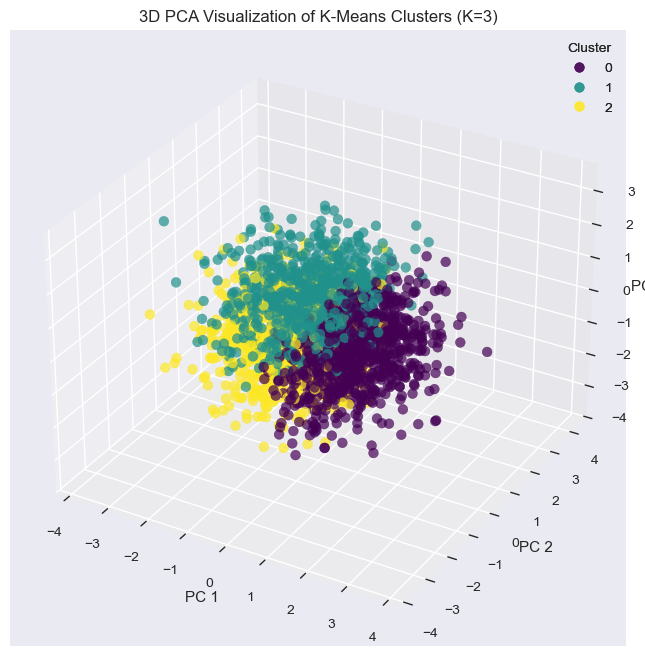

In [92]:
# 3. Create 3D Visualization
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['KMeans_Cluster'] = cluster_labels
pca_df['KMeans_Cluster'] = pca_df['KMeans_Cluster'].astype('category')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
                     c=pca_df['KMeans_Cluster'].cat.codes, 
                     cmap='viridis', 
                     s=50, 
                     alpha=0.7)

ax.set_title(f'3D PCA Visualization of K-Means Clusters (K={K_VAL})')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)
plt.show()
print("")

* ## supervise Learning: Define a reusable function to train, predict, and evaluate model performance......

In [41]:
def evaluate_model(name, model, X_tr, y_tr, X_te, y_te):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    acc = accuracy_score(y_te, y_pred)
    model_results[name] = acc
    trained_models[name] = model
    print("=" + name + "=")
    print("Accuracy:", round(acc, 4))
    print(classification_report(y_te, y_pred, target_names=label_encoder.classes_))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=label_encoder.classes_,
        yticklabels=label_encoder.classes_
    )
    plt.title("Confusion Matrix - " + name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()
    print()
    return model, acc

* ## Logistic Regression Predictions
* ## Logistic Regression Accuracy And
* ## Confusion Matrix, f1-score  for Logistic Regression ...

=Logistic Regression=
Accuracy: 0.9467
              precision    recall  f1-score   support

        High       1.00      0.91      0.95       148
         Low       1.00      0.87      0.93       148
      Medium       0.90      1.00      0.95       304

    accuracy                           0.95       600
   macro avg       0.97      0.93      0.95       600
weighted avg       0.95      0.95      0.95       600



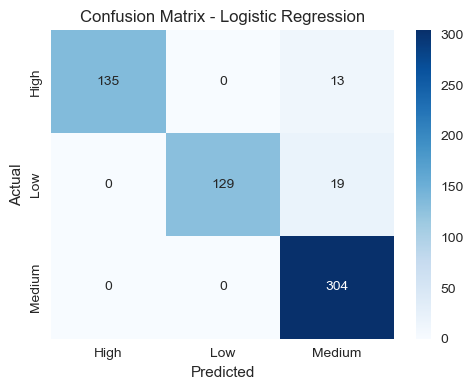


Final Logistic Regression accuracy: 0.9466666666666667


In [67]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, C=0.0084,)
log_reg, log_acc = evaluate_model(
    "Logistic Regression", log_reg, X_train_scaled, y_train, X_test_scaled, y_test
)
print("Final Logistic Regression accuracy:", log_acc)

* ## KNN Predictions
* ## KNN Accuracy
* ## Confusion Matrix, f1-score for KNN

=KNN=
Accuracy: 0.75
              precision    recall  f1-score   support

        High       0.82      0.64      0.72       148
         Low       0.83      0.61      0.70       148
      Medium       0.70      0.87      0.78       304

    accuracy                           0.75       600
   macro avg       0.79      0.71      0.73       600
weighted avg       0.76      0.75      0.75       600



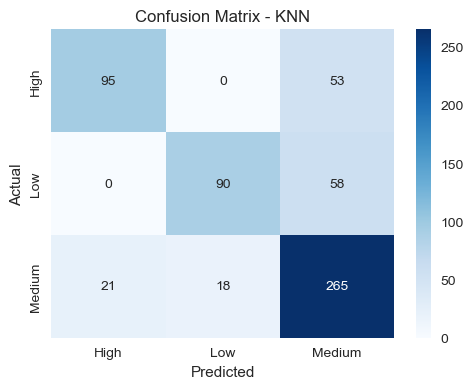

In [43]:
# KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn, knn_acc = evaluate_model(
    "KNN", knn, X_train_scaled, y_train, X_test_scaled, y_test
)

* ## Random Forest Predictions..
* ## Random Forest Accuracy..
* ## Confusion Matrix, f1-score for Random Forest..

=Random Forest=
Accuracy: 0.9983
              precision    recall  f1-score   support

        High       1.00      0.99      1.00       148
         Low       1.00      1.00      1.00       148
      Medium       1.00      1.00      1.00       304

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



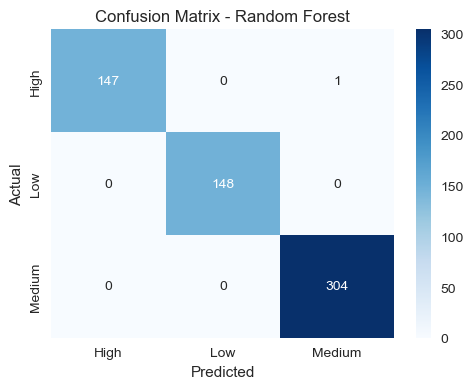

In [75]:
# Random Forest (no scaling needed)
rf = RandomForestClassifier(
    n_estimators=150, max_depth=3, random_state=42
)
rf, rf_acc = evaluate_model(
    "Random Forest", rf, X_train, y_train, X_test, y_test
)

* ## Naive Bayes Model Training
* ## Naive Bayes Predictions
* ## Naive Bayes Accuracy, confusion matrix and f1-score

=Naive Bayes=
Accuracy: 0.995
              precision    recall  f1-score   support

        High       1.00      0.99      1.00       148
         Low       1.00      0.99      0.99       148
      Medium       0.99      1.00      1.00       304

    accuracy                           0.99       600
   macro avg       1.00      0.99      0.99       600
weighted avg       1.00      0.99      0.99       600



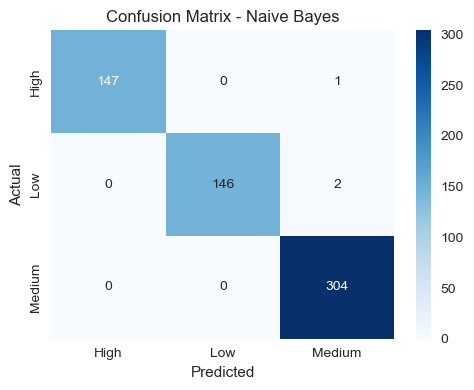

In [45]:
# Naive Bayes
nb = GaussianNB()
nb, nb_acc = evaluate_model(
    "Naive Bayes", nb, X_train_scaled, y_train, X_test_scaled, y_test
)

* ## Support Vector Machine (SVM) Model Training...
* ## Support Vector Machine (SVM) Predictions....
* ## Support Vector Machine (SVM) Bayes Accuracy...

=SVM=
Accuracy: 0.9567
              precision    recall  f1-score   support

        High       0.96      0.96      0.96       148
         Low       0.99      0.92      0.95       148
      Medium       0.94      0.97      0.96       304

    accuracy                           0.96       600
   macro avg       0.96      0.95      0.96       600
weighted avg       0.96      0.96      0.96       600



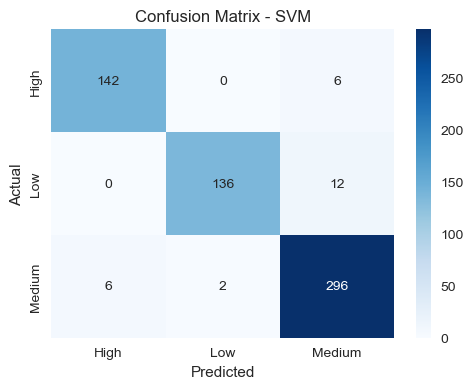

In [46]:
# SVM
svm_clf = SVC(kernel="rbf", C=1.0, gamma="scale", probability=True, random_state=42)
svm_clf, svm_acc = evaluate_model(
    "SVM", svm_clf, X_train_scaled, y_train, X_test_scaled, y_test
)

* ## Model Performance Summary Table visualization.....

In [47]:
print("Model accuracies summary:")
for name, acc in model_results.items():
    print(name + ":", round(acc, 4))

Model accuracies summary:
Logistic Regression: 0.9467
SVM: 0.9567
Naive Bayes: 0.995
Random Forest: 1.0
KNN: 0.75


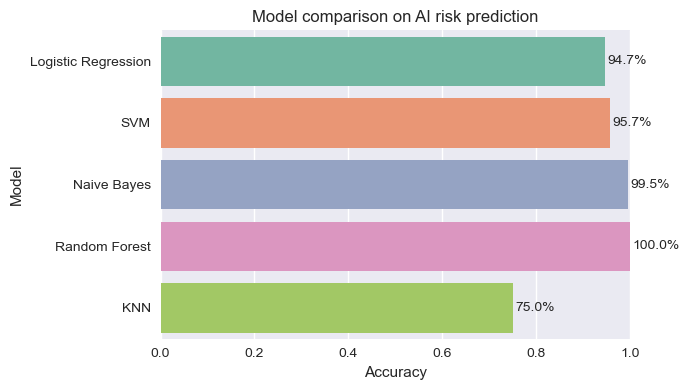

In [48]:
plt.figure(figsize=(7, 4))
model_names = list(model_results.keys())
accuracies = [model_results[m] for m in model_names]
sns.barplot(x=accuracies, y=model_names, palette="Set2")
for i, v in enumerate(accuracies):
    plt.text(v + 0.005, i, str(round(v * 100, 1)) + "%", va="center")
plt.xlim(0, 1)
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model comparison on AI risk prediction")
plt.tight_layout()
plt.show()

* ## Feature importance from Random Forest....

In [69]:
# Feature importance from Random Forest
importances = rf.feature_importances_
feat_names = X.columns
feat_imp = list(zip(feat_names, importances))
feat_imp_sorted = sorted(feat_imp, key=lambda x: x[1], reverse=True)[:10]
feat_labels = [f[0] for f in feat_imp_sorted]
feat_values = [f[1] for f in feat_imp_sorted]

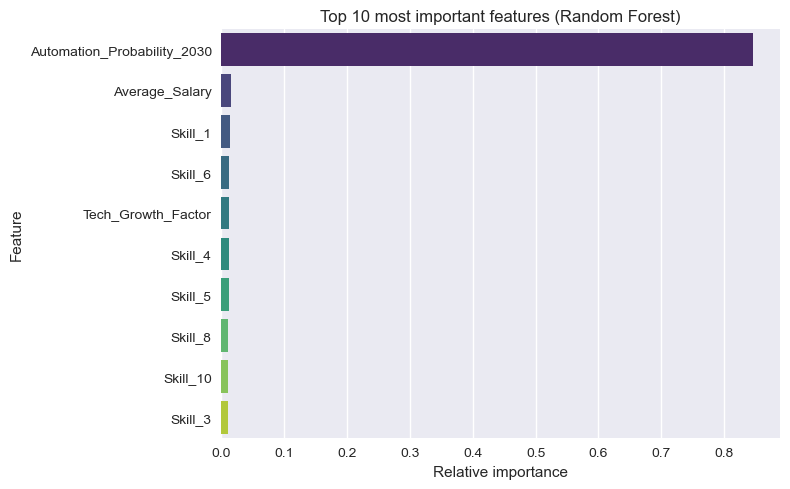

In [27]:
plt.figure(figsize=(8, 5))
sns.barplot(x=feat_values, y=feat_labels, palette="viridis")
plt.title("Top 10 most important features (Random Forest)")
plt.xlabel("Relative importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

* ## visualize the Learning Curve for the best model (Random Forest)....

Best model by accuracy: Random Forest


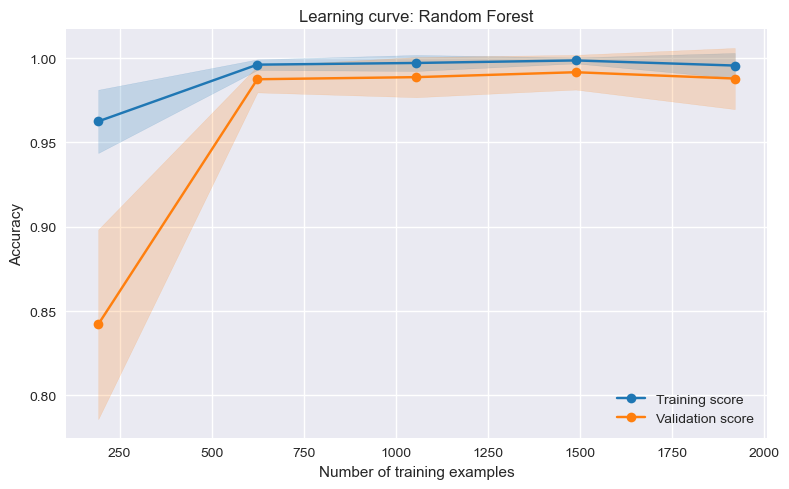

In [76]:
best_model_name = max(model_results, key=model_results.get)
best_model = trained_models[best_model_name]
print("Best model by accuracy:", best_model_name)

#  Choose correct feature representation
if best_model_name in ["Logistic Regression", "Random Forest", "KNN", "Naive Bayes", "SVM"]:
      X_curve = X_train_scaled
else:
     X_curve = X_train

train_sizes, train_scores, test_scores = learning_curve(
    best_model,
    X_curve,
    y_train,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring="accuracy",
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(test_scores, axis=1)
val_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, "o-", color="tab:blue", label="Training score")
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, alpha=0.2, color="tab:blue")
plt.plot(train_sizes, val_mean, "o-", color="tab:orange", label="Validation score")
plt.fill_between(train_sizes, val_mean - val_std,
                 val_mean + val_std, alpha=0.2, color="tab:orange")

plt.title("Learning curve: " + best_model_name)
plt.xlabel("Number of training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

* ## model testing ....

In [33]:
# Create a dictionary for a new job profile (e.g., "Machine Operator")
new_job_data = {
    'Average_Salary': [45000],
    'Years_Experience': [10],
    'AI_Exposure_Index': [0.40],
    'Tech_Growth_Factor': [0.15],
    'Automation_Probability_2030': [0.92],  # Critical for High Risk
    'Skill_1': [0.15], # Low for Cognitive Skills
    'Skill_2': [0.25],
    'Skill_3': [0.85], # High for Manual/Repetitive Skills
    'Skill_4': [0.20],
    'Skill_5': [0.70],
    'Skill_6': [0.35],
    'Skill_7': [0.20],
    'Skill_8': [0.10],
    'Skill_9': [0.50],
    'Skill_10': [0.90] 
}
new_job_df = pd.DataFrame(new_job_data)

In [36]:
new_job_scaled = scaler.transform(new_job_df)
prediction_encoded = best_model.predict(new_job_scaled)
predicted_risk = label_encoder.inverse_transform(prediction_encoded)

print(f"Input Automation Probability: {new_job_data['Automation_Probability_2030'][0]}")
print(f"The Predicted AI Risk Category for the new job is: {predicted_risk[0]} ")

Input Automation Probability: 0.92
The Predicted AI Risk Category for the new job is: High 
